In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_22/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)

# CHEKPOINT - Regresión lineal

Vamos a trabajar con un conjunto de datos sobre alquileres de bicicletas que fue utilizado en un concurso de Kaggle. Se proporcionan datos de alquiler por hora que abarcan dos años. 

**_Queremos predecir el número total de bicicletas alquiladas utilizando sólo la información disponible en el set de entrenamiento._**


**CAMPOS DEL DATASET**

- **datetime** - dia y hora - timestamp
- **season** -  1 = primavera, 2 = verano, 3 = otoño, 4 = invierno
- **holiday** - feriado
- **workingday** - si es dia laborable (1) o fin de semana (0)
- **weather** - 
      1: Clear, Few clouds
      2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      3: Light Snow, Light Rain + Thunderstorm + Scattered clouds,Light Rain + Scattered clouds
      4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

- **temp** - temperatura en Celsius
- **atemp** - sensación térmica
- **humidity** - humedad
- **windspeed** - velocidad del viento
- **casual** - ususarios no-registrados (number of non-registered user rentals initiated)
- **registered** - ususarios registrados (number of registered user rentals initiated)
- **count** - total de alquileres


Notemos que este dataset contiene variables contínuas y categóricas, veremos más adelante como trabajar con ambos tipos. Así mismo, observamos que existen variables que por su composición no pueden utilizarse para predecir el resultado. Este es el caso de los datos bajo las columnas 'casual' y 'registered' que entre ambas suman el resultado a predecir. 

In [2]:
# Importar libreria de pandas 
# Leer los datos de bikeshare.csv y setear datetime como índice. 
import pandas as pd
bikes = pd.read_csv('../Data/bikes.csv', index_col='datetime', parse_dates=True)

In [3]:
# Observar las dimensiones del dataframe
bikes.shape

(10886, 11)

In [4]:
# Tomar una muestra de 10 observaciones (usar el método sample)
bikes.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-10-13 12:00:00,4,0,1,2,25.42,28.030,88,0.0000,10,95,105
2012-10-12 22:00:00,4,0,1,1,16.40,20.455,47,19.9995,17,143,160
2011-05-16 06:00:00,2,0,1,1,21.32,25.000,88,11.0014,11,93,104
2011-07-04 04:00:00,3,1,0,2,27.06,30.305,78,6.0032,8,4,12
2011-10-02 05:00:00,4,0,0,1,13.12,15.150,87,19.0012,0,7,7
2012-01-11 07:00:00,1,0,1,1,8.20,10.605,80,8.9981,9,247,256
2012-03-02 14:00:00,1,0,1,2,18.04,21.970,44,19.0012,29,176,205
2011-07-09 02:00:00,3,0,0,1,26.24,28.790,89,11.0014,12,43,55
2011-04-17 14:00:00,2,0,0,1,21.32,25.000,34,26.0027,170,191,361


In [5]:
# Dado que "count" es un método de pandas, cambiar el nombre de la columna "count" y renombrarla por "total":
bikes.rename(columns={'count':'total'}, inplace=True)

In [6]:
bikes.sample(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2012-02-12 17:00:00,1,0,0,1,7.38,7.575,37,27.9993,4,83,87
2012-09-04 23:00:00,3,0,1,1,29.52,34.850,74,19.9995,12,83,95


# Regresión Lineal

Construir un modelo en **[Scikit-Learn](https://scikit-learn.org/stable/)** lleva 5 pasos.

1.   Preparar los datos en una **matriz de features y un array target**.

2.   Elegir una clase de modelo importando la **clase de estimador** apropiado de Scikit-Learn.

3.   Seleccionar los **hiperparámetros** del modelo **instanciando** la clase con los valores deseados

4.   Ajustar el modelo a los datos invocando el método **fit()** de la instancia del modelo.

5.   Aplicar el modelo a **nuevos datos**:


Empezamos por una regresión lineal simple!

## Regresión Lineal Simple

La regresión Lineal Simple es cuando utilizamos una unica variable para predecir la variable target. En nuestro ejemplo vamos a elegir trabajar con la Temperatura como variable predictora.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos parámetros globales para matplotlib.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 16

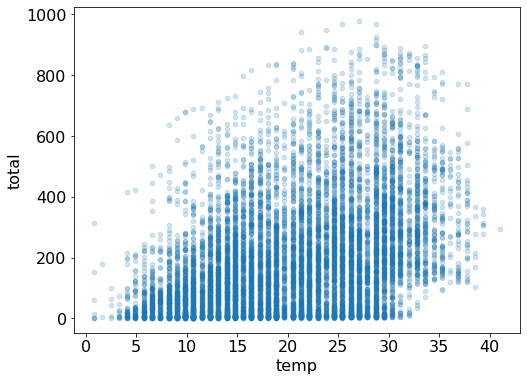

In [8]:
# Realizar un scatterplot con 'temp' sobre el 'eje x' y 'total' sobre el 'eje y'
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2);

In [9]:
# En adelante usaremos un Array 'features_cols' para almacenar los features que usaremos para entrenar el modelo.
feature_cols = []

In [10]:
# instanciar a feature_cols con 'temp' como único argumento
# A continuación crear el arrays de variables independientes X utilizando feature_cols como mascara de nuestro dataframe
# y finalmente generar el array de la variable dependiente y utilizando la columna 'total'
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes['total']

In [11]:
# Importamos paquete, instanciamos el estimador y fiteamos el modelo ("classic" sklearn!)

from sklearn.linear_model import LinearRegression

In [12]:
# Instanciamos el modelo

linreg = LinearRegression()

In [13]:
# Entrenar el modelo con todo el dataset (no usaremos train-test-split en esta oportunidad)

linreg.fit(X, y)

LinearRegression()

In [14]:
# Imprimir los coeficientes y el intercept del modelo entrenado

print (linreg.intercept_)
print (linreg.coef_)

6.046212959616696
[9.17054048]


Interpretación del  **intercepto ** ($\beta_0$):

- Es el valor esperado de $ y $ cuando $ x $ = 0.

Interpretación del coeficiente de ** "temp" ** ($\beta_1$):

- Es el cambio en $ y $ dividido por cambio en $ x $, o la "pendiente".
- Así, un aumento de la temperatura de 1 grado Celsius está ** asociado con ** un aumento de alquiler de 9.17 bicicletas.
 $ \beta_1 $ sería **negativo** si un aumento en la temperatura se asociara con una **disminución** en los alquileres.

### Usando el modelo para predecir

¿Cuántos alquileres de bicicletas podríamos predecir si la temperatura era de 25 grados Celsius?

In [15]:
# calcular total de bicis alquiladas utilizando la formula de la recta con los paramétros calculados anteriormente
# y = b0 + b1*x 

temp= 25

linreg.intercept_ + linreg.coef_*temp

array([235.309725])

In [16]:
# Realizar el mismo calculo pero realizando la prediccion con el modelo que entrenamos.
# nota: deberán convertir la temperatura de entero a un np.array ya que el modelo trabaja con np.arrays 
#(importar numpy)

import numpy as np

test_sklearn = np.array(temp).reshape(-1,1)
linreg.predict(test_sklearn)

array([235.309725])

## Regresión Lineal Multiple

In [17]:
# Exploramos más features
feature_cols = ['temp', 'weather', 'humidity']

In [18]:
# matriz de correlación (rangos de 1 a -1)
bikes[feature_cols].corr()

,temp,weather,humidity
temp,1.000000,-0.055035,-0.064949
weather,-0.055035,1.000000,0.406244
humidity,-0.064949,0.406244,1.000000


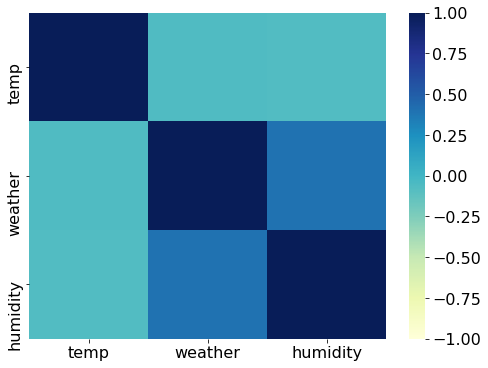

In [19]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap
sns.heatmap(bikes[feature_cols].corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

In [20]:
# Al igual que lo hicimos para regresion lineal simple, crear nuevamente X (utilizando el nuevo feature_cols) e y 
# Luego instanciar el modelo y entrenarlo (nuevamente sin utlizar train-test-split).
# nota: instanciar el modelo bajo el nombre: 'linreg'
# Finalmente imprimir los coeficientes del nuevo modelo.
X = bikes[feature_cols]
y = bikes.total

#instanciamos y entrenamos el modelo
linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

183.23969390859926
[ 8.73698147  3.77938867 -2.80809402]


In [21]:
## para observarlo mejor miramos el nombre con el coeficiente
list(zip(feature_cols, linreg.coef_))

[('temp', 8.736981468839671),
 ('weather', 3.779388671757437),
 ('humidity', -2.808094023675353)]

## Eligiendo entre modelos

### Métricas de evaluación para problemas de regresión

 Hay tres métricas de evaluación comunes para problemas de regresión:

**El error absoluto medio** (MAE) es la media del valor absoluto de los errores:

$$ \frac 1n\sum_ {i = 1}^n |y_i-\hat{y}_i| $$

**Error cuadratico medio** (MSE) es la media de los errores al cuadrado:

$$ \frac 1n\sum_ {i = 1}^n(y_i- \hat{y}_i)^2 $$

**Raiz del Error cuadrático medio** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$ \sqrt{\frac 1n\sum_{i = 1}^n(y_i- \hat{y}_i)^2} $$

todas estas son **funciones de pérdida**, porque queremos minimizarlas.

In [22]:
# Ejemplo de valores de respuesta verdaderos y predichos
true = [10, 7, 5, 5, 10, 8, 8, 15, 12]
pred = [12, 8, 3, 4, 12, 9, 8, 12, 13]

In [23]:
# ¿Calculamos métricas a mano? ¡Por supuesto que no!

from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(true, pred))
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))
print ('R2:', metrics.r2_score(true, pred))

MAE: 1.4444444444444444
MSE: 2.7777777777777777
RMSE: 1.6666666666666667
R2: 0.7054973821989529


## Comparando modelos usando sets de entrenamiento/test y RMSE

In [24]:
# Definir una función y llamarla 'train_test_error' que acepte como parámetro una lista de features (feature_cols), 
# que genere la matriz de variables independentes 'X' y el array de la variable target 'y' 
# que luego haga el split entre train y test reservando un 25% de las observaciones para testeo, 
# y finalmente imprima los errores MAE, MSE, RMSE y R2

from sklearn.model_selection import train_test_split

def train_test_error(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    
    print (feature_cols)
    print ("y_test sample: ",y_test.values[0:10])
    print ("y_pred sample: ",y_pred[0:10].astype(int))
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [25]:
# utilizando la función 'train_test_error' recien creada, comparamos diferentes ensambles de features.
# probar primero con feature_cols = ['temp', 'humidity']
# y luego con feature_cols = ['temp', 'humidity','windspeed']
# Qué observaciones pueden hacer sobre los resultados?

train_test_error(['temp', 'humidity'])
train_test_error(['temp', 'humidity','windspeed'])

['temp', 'humidity']
y_test sample:  [420 444 345 313 413 370 382 332 258 151]
y_pred sample:  [394 394 377 394 411 382 351 351 351 334]
MAE: 154.60330484672812
MSE: 44002.98797986697
RMSE: 209.76889183066913
R2: 0.05953123509528557

['temp', 'humidity', 'windspeed']
y_test sample:  [420 444 345 313 413 370 382 332 258 151]
y_pred sample:  [394 394 378 395 412 384 349 349 349 332]
MAE: 154.54203361463797
MSE: 43999.99767857257
RMSE: 209.7617641005447
R2: 0.05959514632254881



# Creando Features

## Manejo de variables categóricas

Scikit-learn espera que todos los features sean numéricos. Entonces, ¿cómo incluimos una característica categórica en nuestro modelo?

- ** Categorías ordenadas: ** transformarlas en valores numéricos que representan ese orden 
- ** Categorías no ordenadas: ** utilizar codificación ficticia (0/1) (Variables-dummy)

¿Cuáles son las características categóricas de nuestro conjunto de datos?

- ** Categorías ordenadas: ** weather (ya codificado con valores numéricos que representan el orden)
- ** Categorías no ordenadas: ** season (necesita variables dummy), holiday (Ya está codificada como dummy), workingday (ya está codificada como dummy)

Para la estación, no podemos simplemente dejar la codificación como 1 = primavera, 2 = verano, 3 = otoño y 4 = invierno, porque eso implicaría una ** relación ordenada **. En cambio, creamos ** variables dummies: **

In [26]:
# crear variables dummies
season_dummies = pd.get_dummies(bikes.season, prefix='season')

# imprimimos para ver 5 filas cualquieras
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


Nota: El método `get_dummies` puede recibir un dataframe entero, en ese caso no modifica las variables numéricas y genera dummies para todas las categóricas que encuentre. 

Sin embargo, en realidad sólo necesitamos ** tres variables dummy (no cuatro) **, y por lo tanto vamos a dropear la primera variable dummy. 
¿Por qué?

In [27]:
# Eliminamos la primer columna ya que es redundante
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# imprimimos 5 filas cualquieras
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


En general, si se tiene una feature categórica con ** k valores posibles **, se tienen que crear ** k-1 variables dummies **.

In [28]:
# Concatenar el DataFrame original y el dummy DataFrame (axis = 0 significa filas, axis = 1 significa columnas)
bikes = pd.concat([bikes, season_dummies], axis=1)

# imprimimos 5 filas cualquieras
bikes.sample(n=5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2012-02-03 08:00:00,1,0,1,1,9.84,11.365,65,15.0013,12,429,441,0,0,0
2011-08-03 22:00:00,3,0,1,3,27.88,31.820,89,7.0015,11,66,77,0,1,0
2012-04-06 13:00:00,2,0,1,1,18.04,21.970,33,22.0028,173,238,411,1,0,0
2011-03-06 00:00:00,1,0,0,2,17.22,21.210,77,23.9994,11,41,52,0,0,0
2012-03-17 05:00:00,1,0,0,2,17.22,21.210,94,6.0032,5,3,8,0,0,0


In [29]:
# utilizamos ahora la funcion train_test_error que definimos anteriormente con 
# los ultimos features seleccionados (feature_cols = ['temp','humidity','windspeed', 'season_2', 'season_3', 'season_4'])

train_test_error(['temp','humidity','windspeed', 'season_2', 'season_3', 'season_4'])

['temp', 'humidity', 'windspeed', 'season_2', 'season_3', 'season_4']
y_test sample:  [420 444 345 313 413 370 382 332 258 151]
y_pred sample:  [363 363 346 364 380 350 313 313 313 295]
MAE: 150.60954131647796
MSE: 43943.74251077737
RMSE: 209.62762821435862
R2: 0.060797478950507466



Se observa una leve mejora en el R2, pero no muy significativa.

### Continuamos con feature engineering
Crear las siguientes features:

- **hora:** como una variable dummy (de 0 a 23), 
- **día:** como una feature categórica (día = 1 de 7am a 8pm y día = 0 de lo contrario)

In [37]:
# Generar variables dummy a partir de hora
bikes['hora'] = bikes.index.hour
bikes_dummies = pd.get_dummies(bikes.index.hour, drop_first=True)
bikes_dummies.index = bikes.index

In [31]:
bikes_dummies.head()


,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Concatenar las variables dummy al dataframe original
bikes  = pd.concat([bikes,bikes_dummies], axis = 1)

In [33]:
# Crear días como categórica
dia = (bikes.index.hour >= 7) & (bikes.index.hour <= 20)
dia

array([False, False, False, ..., False, False, False])

In [34]:
# Agregar la columna de dia
bikes['dia']= dia.astype(int)
bikes['dia'].sample(5)

datetime
2012-05-06 20:00:00    1
2012-07-02 13:00:00    1
2011-03-04 07:00:00    1
2011-12-19 03:00:00    0
2012-12-19 00:00:00    0
Name: dia, dtype: int64

In [35]:
# Por ultimo corremos nuestra función train_test_error sobre el nuevo set de features:
# ['temp','humidity','windspeed', 'season_2', 'season_3', 'season_4',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

train_test_error(['temp','humidity','windspeed', 'season_2', 'season_3', 'season_4','dia',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

['temp', 'humidity', 'windspeed', 'season_2', 'season_3', 'season_4', 'dia', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
y_test sample:  [420 444 345 313 413 370 382 332 258 151]
y_pred sample:  [319 302 295 359 509 458 360 290 249 210]
MAE: 110.93454063051183
MSE: 25343.033402125897
RMSE: 159.1949540724388
R2: 0.4583474346437254



MAE, nos dice que el error en promedio, sera de 110 alquileres de bicicletas.

El MSE, penaliza mas los valores mas alejados, pero al estar al cuadrado, cuesta darle una interpretacion, asi que usamos RMSE.

El RMSE, nos dice que en promedio el error es de 159 alquileres de bicicletas.

El R2 score, nos dice que tanto mejor se desempeña nuestro modelo en comparacion con utilizar la media de los valores. O tambien, que tan bien explican las features utilizadas, la variabilidad de los alquileres.

## Conclusiones: 

Ventajas de la regresión lineal:

- Simple de explicar
- Muy interpretable
- El entrenamiento y predicción de modelos son rápidos
- Es invariante a cambios en la escala de los features. 


Desventajas de la regresión lineal:

- El rendimiento es (generalmente) no competitivo con los mejores métodos de aprendizaje supervisado debido a un alto sesgo